<a href="https://colab.research.google.com/github/hardiv/AI-Projects/blob/main/Basics_of_Machine_Learning_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning in Python

This notebook introduces you to the *gradient descent algorithm* and how to implement a single neuron from scratch, including the automatic optimization of its weight and bias.

For basic first steps in Python, check out our “Python in 10 minutes” introduction video.

You can happily edit and code away in this notebook, but to save your changes, you have to make a copy into your Google Drive (File -> Save a copy in Drive).

⚠️ ***Before you start, please execute (▶) the initialization cell below:***

In [ ]:
# Imports

import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.style.use("seaborn")
import random
from math import e as euler
from sklearn.datasets import load_iris, load_boston
from sklearn.metrics import accuracy_score


# Utility Functions
def plot_function(function,minx=-10,maxx=10):
    x = np.linspace(minx,maxx,300)
    y = function(x)
    plt.plot(x,y)

def plot_two_functions(function1,function2):
    x = np.linspace(-10,10,300)
    y1 = function1(x)
    y2 = function2(x)
    plt.plot(x,y1, label="Function")
    plt.plot(x,y2, label="Derivative")
    plt.legend()
    plt.show()

def plot_data(X,y,features=(0,1),feature_colours=("blue","red")):
    x_points = [point[features[0]] for point in X]
    y_points = [point[features[1]] for point in X]
    
    colours = []
    for label in y:
        if label == 1:
            colours.append(feature_colours[0])
        else:
            colours.append(feature_colours[1])
    plt.scatter(x_points,y_points,c=colours)
    plt.show()

def load_data(feature=1):
    X, y =load_iris(return_X_y=True)
    y = np.where(y==feature,1,-1)
    return X, y



# 1&nbsp;&nbsp;Derivatives or Rate of Change

In the most basic form, when we take the derivative of a function we are trying to find the *rate of change* of that function. Let's take an example of this in order to make it clear. We can consider the most basic function, the “identity function” that maps all of the elements to themselves, such as \\(f(x)=x\\). We can visualise the function bellow:

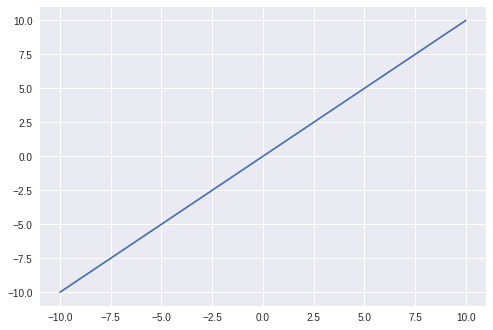

In [ ]:
#@markdown $f(x) = x$
def f(x):
    return x

plot_function(function=f)

As we can see, the function is increasing at constant rate. So only by using logic, we can deduce that this function does not change it's direction or more exactly, “The rate of change is constant”. By taking the derivative at all  points of the function, we arrive at the following graph:

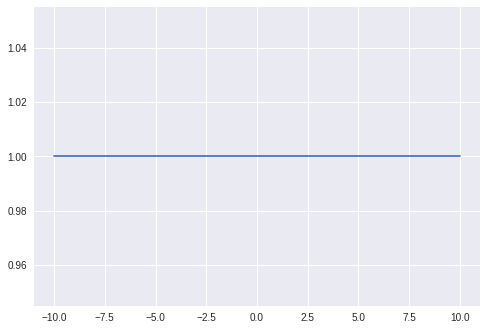

In [ ]:
#@markdown $f'(x) = 1$
def f(x):
    return x/x

plot_function(f)

Good, so we discovered that the rate of change is constant and equal to one. Let's try a different example! Let's consider the function \\(f(x)=x^2\\).  What do you think is happening with the following rate of change? Is it growing, is it constant or is it diminishing?

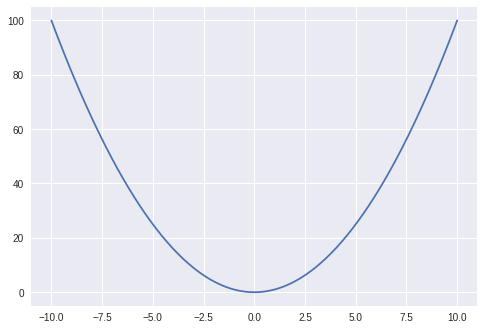

In [ ]:
#@markdown $f(x)=x^2$
def f(x):
    return x**2

plot_function(f)

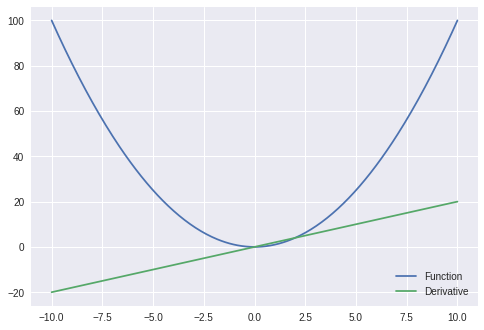

In [ ]:
#@markdown You can visualise it below:
def f_deriv(x):
    return 2*x

plot_two_functions(f,f_deriv)

Now that we have an intuition, we can see the math behind it. In the first example, we had \\(f(x)=x \\). If we take the derivative, we see that \\(f'(x) = 1 \\). This makes total sense given what we observed in the graph. Now, if we look in the second example, we see that \\(f'(x)=2x\\) which again, makes sense. The derivative is constantly growing by a factor of two; indeed it starts out negative (left of $x=0$) and becomes positive as we move to the right. If we take the derivative of the derivative, we will arrive at \\(f''(x) = 2\\) which means that the derivative is increasing by a factor of two. 

### 1.1&nbsp;&nbsp;Partial Derivatives

Partial Derivatives are no different than the ones we seen above but this time, we have more than one variable. So what we want to do is we want to find how much does one variable affect the function, assuming that all other variables of the function are kept the same. Let's take this very simple example of \\(f(x,y)= x - y \\) and let's say we want to find how much does \\(x\\) influence \\(f(x,y)\\). We call this the “derivative of \\(f(x,y)\\) with respect to \\(x\\)”, in formulas written as \\(\frac{\partial f}{\partial x}\\). In order to find this derivative, we have to lock the y variable or in other words, consider it to be constant like a normal number. This makes \\(\frac{\partial f}{\partial x}= 1\\). Similarly, \\(\frac{\partial f}{\partial y}= -1\\).

## 1.2&nbsp;&nbsp;Gradient Descent

Gradient Descent is an algorithm that is able to find the minimum of a function by computing the partial derivatives of a function and making a step where the derivatives are descending. But let's see an example.

Consider that we have a very basic function \\(f(x)= 3x^2 \\) which can be visualized below. We can observe from the graph that the function has the minimum at \\(x=0\\) but for the purpose of the exercise, let's try to find that minimum using gradient descent. Let's consider we have a point on the left of the minimum \\(x=-4\\) and we compute the derivative \\(f'(x) = 6x\\). By computing $f'(-4)$, we get \\(-24\\) which means that the function is decreasing with $x$ around $x=-4$. So we want to take a step to the right (increase $x$). A way to do this is to subtract from the initial point \\(x=-4\\) this gradient \\(-24\\) which will give us a new point of \\(x=20\\). We can see that this was a step into the right direction but it overshoots the target. Let's try again but this time we multiply this gradient by a diminishing factor (the “learning rate”) so that we make a smaller step. Again, we take the initial\\(-4\\) but this time we subtract \\(0.1\cdot -24\\) which gives us \\(-1.6\\) which is really good, we are moving in the right direction. In mathematical notation, this is what we have done:

$$x_{t+1} = x_t - \gamma \nabla f(x)$$

Here, $\nabla f(x)$ denotes the vector of all partial derivatives, and is called the **gradient** of $f$ at $x$, which explains the name “gradient descent”.  For our simple function $f:\mathbb R\to\mathbb R$, the gradient $\nabla f(x)$ is simply the number $f'(x)$.

# 2&nbsp;&nbsp;Data

We are told that data is all around us, whenever we look at a news article or we read a blog, we are mostly looking at data. This digital world in which we live generates a huge amount of data each second. Imagine what type of data your phone produces, you have you screen time, your location, how much battery you had when you ran the app x and y or even how long you stopped to look at that Instagram post. Now we will have a look into what data generally looks like and how it is represented. Let's consider the following table:

| Person | Height | Weight | Obese |
|--- | --- | --- | --- |
| Person-1 | 174 | 76 | No |
| Person-2 | 156 | 56 | No |
| Person-3 | 160 | 140 | Yes |

## 2.1&nbsp;&nbsp;Instances

In our table the instances are the rows of the table. So the first instance is Person-1 with a height of 174cm and the weight of 76kg.

## 2.2&nbsp;&nbsp;Features

Features are columns that describe each instance. For example the features of the above table are “Height”, “Weight” and “Obese”.

## 2.3&nbsp;&nbsp;Labels

Labels a special kind of feature that we try to predict. In classification, we say we try to predict the label. This is different than when we try to predict a continuous feature such as the weight and height. In our table, the only feature that represents a label is the Obese Feature which describes the status of an object. In general we can encode those in binary (ones and zeroes) to encode the truth value:

| Person | Height | Weight | Obese |
|--- | --- | --- | --- |
| Person-1 | 174 | 76 | 0 |
| Person-2 | 156 | 56 | 0 |
| Person-3 | 160 | 140 | 1 |

Keep in mind that this binary representation doesn't have to be made out of ones and zeros, it can also be made out of any numbers we want (eg. 1 and -1 or even 123 and 2319831). 

We can even design our own categories and thus create labels. For example, we can transform the height feature into discrete labels such as “tall”, “average” and “short”. We can even generate new ones out of combining them, by combining the height and weight into BMI and match each range to the fit, average, healthy categories. This is called feature engineering and it deserves a lot of attention and understanding of the problem but the information given so far shall suffice for our purpose.

## 👉 Your Turn!!!

Consider the table from below where each ```Person``` is an instance, the ```Height``` and ```Weight``` are the features and the label is the ```Obese``` feature.

| Person | Height | Weight | Obese |
|--- | --- | --- | --- |
| Person-1 | 174 | 76 | 0 |
| Person-2 | 156 | 56 | 0 |
| Person-3 | 160 | 140 | 1 |

🤨 
Always try to solve the exercises before peeking at the solutions!

But if you're stuck, don't despair 🥺 You can double click the solution box to reveal how it ~is done~ can be done (almost always there are many different ways to solve a task).

### a)
We usually call the collection that contains the variables X and the label y. Write a collection that contains the features for each ```Person``` (eg. ```Person-1```: ```Height```,```Weight```).

In [ ]:
# Add your code below this line

In [ ]:
#@markdown 🤨 Solution

person_1 = [174, 76]
person_2 = [156, 56]
person_3 = [160, 140]

### b) 
Combine all of the Features in one single callection called X. 

In [ ]:
# Add your code below this line

In [ ]:
#@markdown 🤨 Solution

X = [person_1,person_2, person_3]

### c)
Print the features of each person  in the format ```Person-person number: Height-value, Weight-value```

In [ ]:
# Add your code below this line

In [ ]:
#@markdown 🤨 Solution

# simple way
i = 1
for person in X:
    # print("Person-",i,": ","Height-", person[0], ", Weight-", person[1]) # uncomment to print
    i += 1

# f-string way, uncomment bellow
# i = 1
# for person in X:
#     print(f"Person-{i}: Height-{person[0]}, Weight-{person[1]}")
#     i += 1

### d)
Write a collection that contains all of the labels.

In [ ]:
# Add your code below this line

In [ ]:
#@markdown 🤨 Solution

y = [0,0,1]

### e)
Write a code that will display the Person along with its features and label. (e.g. Person, Features, Label)

In [ ]:
# Add your code below this line

In [ ]:
#@markdown 🤨 Solution

i = 1
for features, label in zip(X,y):
    # print("Person -",i, ",Features:",features, ",Label:",label) # uncomment to print
    pass

# 3&nbsp;&nbsp;Perceptron

Now we are ready to introduce the Perceptron. The perceptron is generally trying to mimic the anatomy of a (biological) neuron. In most basic terms, a neuron gets activated (meaning that it ``fires'' electricity to other neurons which it is tied to) when the electricity received from other neurons exceeds a certain threshold. In mathematical form, we encode the synapses (the paths on which other neurons fire towards our neuron) through weights (which are just constant numbers) which gives us the following:

$$\text{neuron gets activated if  }\;  \mathit{input} * \mathit{weight} \geq \mathit{threshold}$$

This is the original idea of an artificial neuron. But we can tweak it a little and transform it into a continuous function. To differentiate between the two we change this threshold with a bias, which gives us:

$$\text{neuron output} = z(\mathit{input}) = \mathit{input} * \mathit{weight} + \mathit{bias}$$

## 3.1&nbsp;&nbsp;Output

So far we talked about a single input and a single weight, but what happens when we have two inputs? Well, nothing special, we just have more indices to take care of which will make our function if the inputs are \\(\mathit{input}_1,\mathit{input}_2\\):

$$z(\mathit{inputs}) = \mathit{input}_1 \cdot \mathit{weight}_1 + \mathit{input}_2 \cdot \mathit{weight}_2 + \mathit{bias}$$

This equation can be fully represented by variables such that if $X$ is an instance which contains the following data points \\([x_1, x_2] \\) then:

$$z(X) = x_1 \cdot w_1 + x_2 \cdot w_2 + b$$

Great, this is our first neuron! Now we know how to play with different input sizes. Considering our table, what will we feed to our Perceptron as inputs? (The table can be found bellow for convenience):

| Person | Height | Weight | Obese |
|--- | --- | --- | --- |
| Person-1 | 174 | 76 | 0 |
| Person-2 | 156 | 56 | 0 |
| Person-3 | 160 | 140 | 1 |

### 👉 Your Turn

#### a) 
Create a collection that represents the weights (remember, each input has to have a coresponding weight). Additionally, create a bias variable. In general you will want to name this W and b respectively and you will try to pick them in the interval $[0,1]$.



In [ ]:
# Write your code here

In [ ]:
#@markdown 🤨 Solution

W = [0.2,0.4]
b = 0.5

#### b) 
Use the random module to generate those instead. The syntax ```random.random()``` will randomly generate a number in the interval $[0,1]$.

In [ ]:
# Write your code here

In [ ]:
#@markdown 🤨 Solution

W = []
for i in range(2):
    W.append(random.random())

b = random.random()

#### c)
Create a function that takes an instance (eg. `person-1`), a series of weights ($W$) and a bias term ($b$) and computes the output $z$. Name the function ```calc_z``` (this makes it easier to check if there is a mistake, you can name it ```multiply_input_with_weights_and_add_bias``` if you want but that's a bit too much writing). Run the function for every instance (person) and save the result in a list called ```Z```.

In [ ]:
# Write your code here

In [ ]:
#@markdown 🤨 Solution

Z = []

def calc_z(instance,W,b):
    z = 0
    for x_i, w_i in zip(instance,W):
        z += x_i*w_i
    z += b
    return z

for instance in X:
    z = calc_z(instance,W,b)
    Z.append(z)

## 3.2&nbsp;&nbsp;Activation Functions

What is happening if we feed the output of one neuron (or Perceptron) to another one? Well, first of all we say that we added a layer but let's see what happens mathematically. In essence, we will have the following equation:

$$ z_2 (z_1 (x) )= w_{2} \cdot \underbrace{(w_{1,1} \cdot x_1 + w_{1,2} \cdot x_2 + b_1)}_{\text{First Neuron}} + b_2 $$ 

And as you can see, we just multiply the output with a constant and add a number to it which is not very helpful as for example, we could just add the number to the previous bias and multiply everything by that constant which will still result in a line.  For this task, we need something a bit more special and as you probably guessed, we need something called an *activation function*.

So what does an activation function do? It basically maps the inputs to a nonlinear output. In the previous example we encountered a linear output, which is only a line (a line remains a line, however we twist it or move it) and now, we will learn functions that transform the line into a “squiggle” for example. Remember, an activation function just transforms the output, as a result we would have \\(a(z)\\).

### Signum

Starting with the most basic activation function, we just want the neuron to activate when the a threshold is passed so we do just that:

$$a(z) =\begin{cases} +1 \text{ if } z \geq 0 \\ -1 \text{ if } z< 0   \end{cases} $$

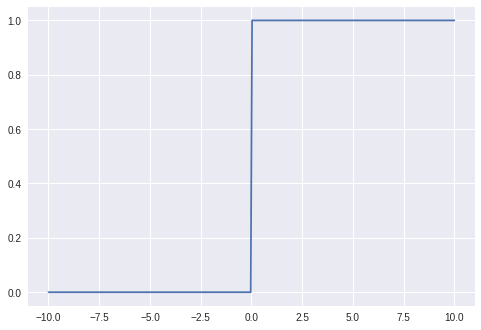

In [ ]:
#@markdown Signum Function
def signum(z):
    return np.heaviside(z,1)

plot_function(signum)

### Sigmoid

The second activation that we will study is a bit more special, in the sense that we will actually output a number in the interval \\((0,1)\\) (notice that we never reach the minimum or maximum, that is because those represent \\(\infty \\) and \\(-\infty\\)). This is expressed as:

$$ a(z)= \sigma(z) = \frac{1}{1+e^{-z}} $$

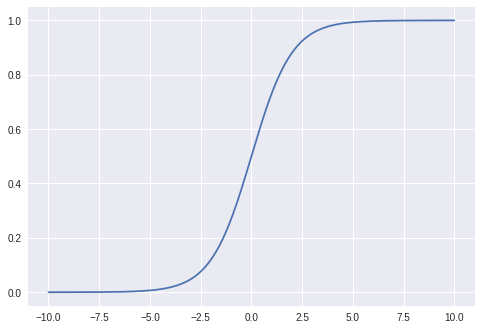

In [ ]:
#@markdown Sigmoid Function
def sigmoid(z):
    return 1/(1+np.exp(-z))

plot_function(sigmoid)

### TanH

The hyperbolic tangent (or TanH for short) activation function is similar to the Sigmoid one but it is bounded by the interval \\((-1,1)\\) and is represented by:

$$a(z) = \tanh(z) = \frac{e^z -e^{-z}}{e^z + e^{-z}}$$

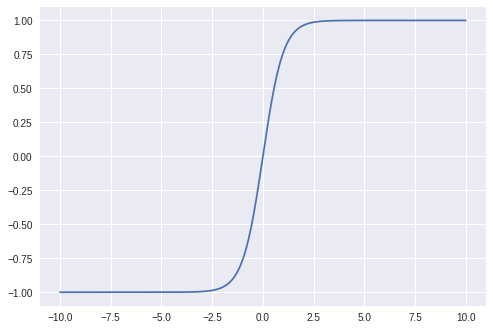

In [ ]:
#@markdown TanH Function
def tanh(z):
    return (np.exp(z)-np.exp(-z))/(np.exp(z) + np.exp(-z))

plot_function(tanh)

There are many more activation functions and if you are curious, you can find them [here](https://en.wikipedia.org/wiki/Activation_function).

### 👉 Your Turn!

#### a)
Create a Python function for each of the activation functions described above. It should take a single argument $(z)$ and return $a(z)$. Use the exact names (`calc_signum`, `calc_sigmoid`, `calc_tanh`).

For both the sigmoid and tangent you will need the euler number $e$. This can be simply called with ```euler```.

In [ ]:
print(euler)

2.718281828459045


In [ ]:
# write your code here

In [ ]:
#@markdown 🤨 Solution

def calc_signum(z):
    return (-1 if z<=0 else 1)

def calc_sigmoid(z):
    return 1/(1+euler**z)

def calc_tanh(z):
    return (euler**z-euler**(-z))/(euler**z + euler**(-z))


#### b)
Compute each $a(z)$ using all of the activations defined earlier for all the $Z$ values calculated earlier.

In [ ]:
# write your code here

In [ ]:
#@markdown 🤨 Solution
 
for z in Z:
    for activation in [calc_signum,calc_sigmoid,calc_tanh]:
        # print("Z: ",z ,"Activation: ", activation(z)) # uncomment to print
        pass

# 4&nbsp;&nbsp;Loss Functions

How do we know whether given parameters for a neural network work well? Since we know the correct labels for our training dataset, we can compare the actual labels to the ones our network assigned to the examples. To quantify the difference between these labels, we use a so-called *loss function* and try to minimize that loss function, i.e. find parameters that make the loss as small as possible.

We have already seen the most basic loss function in the partial derivative section (well, almost ...). The function simply computes the difference between two numbers (predicted and actual). 
But we have an issue here: what if the result is negative? A solution to this problem is to take the square of the difference (be mindful that this penalizes the big differences much more than the small ones, which might intuitively make sense). 
So our basic loss function is:

$$L= (a(z)-y)^2 $$

where

\begin{align}a(z) &= \text{ the predicted output} \\ y &= \text{ the correct output}\end{align}

## 👉 Your Turn!

### a)
Create a new set of labels (1 and -1 instead of 1 and 0). Save them in the variable ```y```.

In [ ]:
# write your code here 

In [ ]:
#@markdown 🤨 Solution

y = [-1, -1, 1]

### b)
Define the loss function above that takes the predicted label and the real label and computes the loss. Name the function ```calc_loss``` and compute the loss for each of $Z$ using the signum activation. Print the results. If everything went well, you shall be able to see that if the labels match, the loss is 0, otherwise is 4. 

In [ ]:
# write your code here

In [ ]:
#@markdown 🤨 Solution

def calc_loss(a_z,y):
    return (a_z - y)**2

for z_i, y_i in zip(Z,y):
    a_z = calc_signum(z) 
    loss = calc_loss(a_z, y_i)


## Exercise

Let's check the knowledge so far by doing a simple exercise. Given the People table from below, the Weights \\(w_1=-208, w_2=284\\) and bias \\(b=0\\) and the Signum activation function, can you predict which person is obese and compute the Loss? 

| Person | Height | Weight | Obese |
|--- | --- | --- | --- |
| Person-1 | 174 | 76 | 0 |
| Person-2 | 156 | 56 | 0 |
| Person-3 | 160 | 140 | 1 |

In [ ]:
# write your code here

In [ ]:
#@markdown 🤨 Solution

W = [-208, 284]
b = 0

i = 1
for x_i, y_i in zip (X,y):
    z = calc_z(x_i,W,b)
    a_z = calc_signum(z)
    # print("Person -",i,"Prediction: ", a_z) # uncomment to see
    i += 1

# 5&nbsp;&nbsp;Update Rule or How the Perceptron Learns

Now we will consider how to *change* the weights of a neuron so as to reduce the loss.

The essence of this learning comes from the geometric interpretation. In a nutshell, the 
boundary that separates the two classes gets pushed or pulled based on the incoming point. You can visualize this below. 

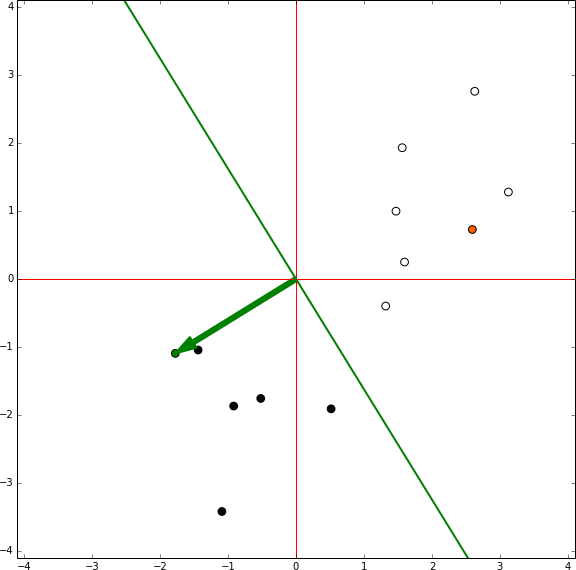

In mathematical form, this process comes up to be:

\begin{align} W &= W + \eta\cdot(a(z)-y)\cdot X \\ b &= b + \eta\cdot(a(z)-y)\,,\end{align}

where \\( \eta \\) (“eta”) is the parameter that makes convergence possible, like in our gradient descent example.

## 👉 Your Turn!

### a)
Create a function ```update_parameters``` that takes the weights, bias, predicted label, the actual label, the inputs, and the eta parameter and returns the new weights and bias. 

In [ ]:
# write your code here

In [ ]:
#@markdown 🤨 Solution

def update_parameters(W, bias, a_z, y, X, eta=0.2):
    new_weights = []
    new_bias = bias + eta*(y-a_z)
    for w_i, x_i in zip(W,X):
        w_i += eta*(y-a_z)*x_i
        new_weights.append(w_i)
    return new_weights, new_bias

# 6&nbsp;&nbsp;Problem I &ndash; Warmup!

You have the following dataset:

|  | Feature-1 | Feature-2 | Label |
|--- | --- | --- | --- |
| 1 | 1 | 1 | 1 |
| 2 | 1 | -1 | 1 |
| 3 | -1 | 1 | -1 |
| 3 | -1 | -1 | -1 |

Find the weights and biases that separate this dataset using the Perceptron Algorithm (don't forget it uses the signum activation function). For simplicity, the algorithm steps are written bellow:

1. Set $\eta$ to some number.
2. Randomly initialize the weights and bias (make sure the number of weights are equal to the number of features).

3. Compute $z(x)$.
4. Compute $a(x)$.
5. Update the weights and bias.
6. Repeat all of these steps $r$ times (e.g. $r=1000$).

In [ ]:
# write your code here

In [ ]:
#@markdown 🤨 Solution

X = [[1,1],[1,-1],[-1,1],[-1,-1]]
y = [1,1,-1,-1]

n_iterations = 2000 
eta = 0.2

W = [random.random(), random.random() ]
b = random.random()

for _ in range(n_iterations):
    for x_i, y_i in zip(X,y):
        z = calc_z(x_i,W,b)
        a_z = calc_signum(z)
        W, b = update_parameters(W,b, a_z, y_i, x_i, eta)
    

Let's see if our Perceptron found the right boundary. Make sure your weights and bias are called ```W``` and ```b``` and run the following cell. If it is not yet dividing the points properly, try increasing the number of iterations $r$ or modifying $\eta$.

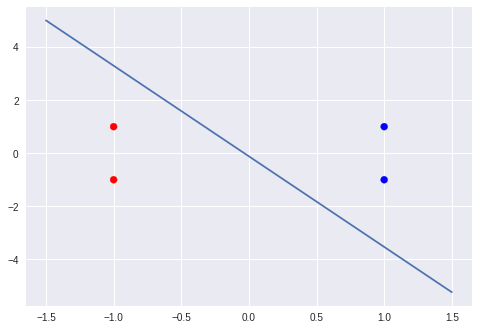

In [ ]:
#@markdown Plot Boundary

def boundary_function(x, b=b, w1=W[0], w2=W[1]):
    y = (-(b / w2) / (b / w1)) * x + (-b / w2)
    return y

plot_function(boundary_function,minx=-1.5,maxx=1.5)
plot_data(X,y)

# 7&nbsp;&nbsp;Problem II &ndash; The Iris Dataset

Let's bring a more complicated problem with real data to the table! How about classifying flower types? 

A very well studied benchmark dataset, called the “Iris Dataset” has been introduced by Ronald Fisher and contains three species of the flower *Iris*, namely *Iris setosa*, *Iris virginica* and *Iris versicolor*. The dataset describes each flower through four features (the length and width of the sepals and petals, respectively). We will select a class which will become our positive class ($+1$) and we will give the rest the label ($-1$). You can pick your class by choosing an element from  $\{0,1,2\}$ So, let's see it!

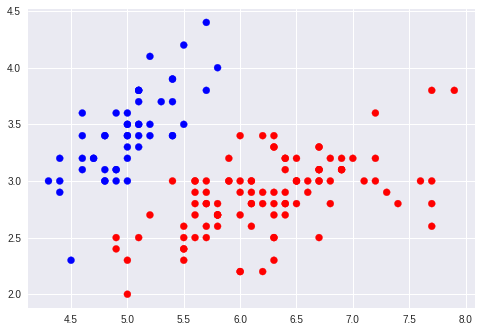

In [ ]:
# Try all of the features, which one is the simplest to classify?
X, y = load_data(feature=0)
plot_data(X,y)

Now it's the time to solve it! Train your Perceptron and then predict all of the labels by computing the $a(z)$ for each of the instances. Save those predictions in a list called ```predictions```. Make sure the true label is stored in the ```y```variable. Then run the “Check accuracy” cell below to see how well the perceptron did.

In [ ]:
# write the solution here

In [ ]:
#@markdown 🤨 Solution
W = [random.random() for i in range(4)]
b = random.random()

def predict(X,activation=calc_sigmoid):
    outputs = []
    for x_i, y_i in zip(X,y):
        z = calc_z(x_i,W,b)
        a = activation(z)
        outputs.append(a)
    return outputs

def train(X,y,W,b,activation=calc_sigmoid, eta=0.2, n_iter=2000):
    for _ in range(n_iter):
        for x_i, y_i in zip(X,y):
            z = calc_z(x_i,W,b)
            a = activation(z)
            W , b = update_parameters(W,b,a,y_i,x_i,eta=eta)
    return W, b

W,b = train(X,y,W,b,calc_signum)
predictions = predict(X, activation=calc_signum)

In [ ]:
#@markdown Check accuracy

print(f"Accuracy: {accuracy_score(y,predictions)*100}%")

Accuracy: 100.0%


### **🎉 Congratulations!!**

You have just implemented your very own perceptron (neural network) including gradient descent learning!  Well done!


* * * 

The remainder of this notebook is to give you some further guidance and food for thought if you want to dig even deeper into neural networks. 🤓

It sheds light on how the formulas for gradient descent from above look like they do, and how this can be generalized to full artificial neural networks that chain neurons together.

# 8&nbsp;&nbsp;Backpropagation

Above, the formulas for updating weights and biases were motivated intuitively from a geometric analogy, but there is a more “mechanic” way to arrive at these update rules, which then also works for neural networks with several layers of neurons.

In most basic terms, *backpropagation* computes how much a variable influences the output. Sounds familiar? That is because that is exactly what a derivative does! A general algorithm for computing this is to first compute the predicted value by computing $z$ and $a(z)$, then computing the loss (this is called a *forward pass*). Then we go *backward* and we *propagate* the error back to our model variables (weights and biases). You can see why it is called backpropagation now.

So let's start with the end (you don't hear this phrase very often). We already computed the forward pass before, so what we need to do is to compute the partial derivative of the Loss , with respect to the neuron's output (\\(\frac{\partial Loss}{\partial a(z)}\\)) or, in other words, the influence of \\(a(z)\\) on the \\(Loss\\). By doing so, we arrive at:

$$\frac{\partial Loss}{\partial a(z)} (a(z)-y)^2=2\cdot (a(z)-y)$$

Great, what do we do now? Well, we will definitely have to see the partial derivative of the activation with respect to $z$. Let's consider the sigmoid activation for this example. It turns out that this derivative is:

$$a'(z)=\sigma'(z)= \sigma(z)(1-\sigma(z))$$

Now, we have to calculate the derivative of z with respect to the weights. Let's consider only one weight and one input:

$$\frac{\partial z(x)}{\partial W} w\cdot x + b$$

By treating everything else as constant, the derivative is going to be:

$$\frac{\partial z(x)}{\partial W} w\cdot x + b= 1 \cdot x + 0 = x$$

The same is true for every other weight. Doing the same with the bias we arrive at:

$$\frac{\partial z(x)}{\partial b} w\cdot x + b= 0 \cdot 0 + 1 = 1$$

Now what is the derivative of $z$ with respect to the previous activations (keep in mind that the $x$ is just the previous layer output)? The same as before but this time we will write $L-1$ to denote the previous layer:

$$\frac{\partial z(a_{L-1})}{\partial a_{L-1}} w_L\cdot a_{L_1} + b_L= w_L \cdot 1 + 0 = w_L$$

Finally, putting everything together, we have the [chain rule of calculus](https://en.wikipedia.org/wiki/Chain_rule) which helps us combine those rate of changes to find out how much a weight in the first layer, for example, influences the cost. For example, the partial derivative of the loss with respect to the weight in layer \\(L-1\\) is going to be:

$$\frac{\partial Loss}{\partial w_{L-1}} = \frac{\partial Loss}{\partial a_{L}} \cdot \frac{\partial a_L}{\partial z_L} \cdot \frac{\partial z_L}{\partial a_{l-L}} \cdot \frac{\partial a_{L-1}}{\partial z_{L-1}} \cdot \frac{\partial z_{L-1}}{\partial w_{L-1}}$$

You can see that we just walk from partial derivative to partial derivative. They are actually pretty simple once you understand how to move on the tree of computations. Just think about it while looking at the image below:



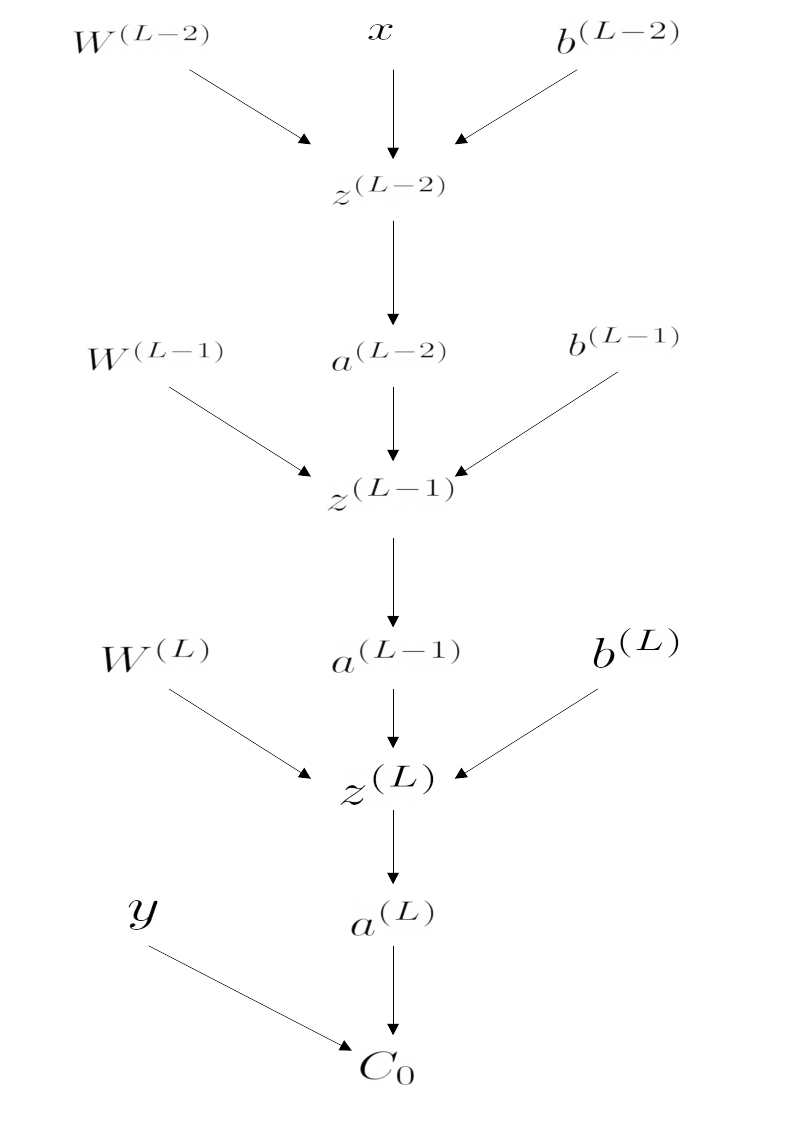

## 👉 Your Turn!

### a)
In our previous case, we have already explored all of those derivatives. In the case of a single neuron, what will be the partial derivative of the Loss with respect to the weights and with respect to the bias? For convenience, here are all the derivatives that we need (just see that we plug in the results from the first on to the second one and so one, they are all tied together):

$$\frac{\partial Loss}{\partial a(z)} (y-a(z))^2=2\cdot (y-a(z))$$


$$\frac{\partial Loss}{\partial z(x)} =\frac{\partial Loss}{\partial a(z)} \cdot \frac{\partial a(z)}{\partial z} = \frac{\partial Loss}{\partial a(z)} \cdot a'(z)= \frac{\partial Loss}{\partial a(z)} \cdot \sigma'(z)= \frac{\partial Loss}{\partial a(z)} \cdot \sigma(z)(1-\sigma(z))$$




$$\frac{\partial Loss}{\partial W} = \frac{\partial Loss}{\partial z(x)} \cdot \frac{\partial a(x)}{\partial W} = \frac{\partial Loss}{\partial z(x)}  w\cdot x + b= \frac{\partial Loss}{\partial z(x)} \cdot 1 \cdot x + 0 = \frac{\partial Loss}{\partial z(x)} \cdot x$$


$$\frac{\partial Loss}{\partial b} = \frac{\partial Loss}{\partial z(x)} \cdot \frac{\partial z(x)}{\partial b} = \frac{\partial Loss}{\partial z(x)} \cdot w\cdot x + b= 0 \cdot 0 + 1 = \frac{\partial Loss}{\partial z(x)} \cdot 1$$


In [ ]:
# write your code here

In [ ]:
#@markdown 🤨 Solution

# Considering the iris data and a single instance
x_i = X[0]
y_i = y[0]

# compute z
z = calc_z(x_i,W,b)

# compute a
a = sigmoid(z)


# compute the derivative of loss with respect to the activation
loss_az = 2*(y_i - a)

# compute the derivative of loss with respect to z
loss_z = loss_az * a*(1-a)

# compute the derivative of loss with respect to the weights

loss_w = []
for x in x_i:
    loss_w.append(loss_z * x)

# compute the derivative of loss with respect to the bias

loss_b = loss_z * 1

Congratulations! You just computed all of the gradients required to update the parameters of our simple neuron with the sigmoid function! The only thing we have to do is to use the gradient formula! 

$$x_{t+1} = x_t - \gamma \nabla f(x)$$


### b)
 Consider the gradient formula from above and a \\(\gamma=0.2\\), update the weights and biases. 

In [ ]:
# write your code here

In [ ]:
#@markdown 🤨 Solution

eta = 0.2
new_W = []
for w_i, gradient in zip(W,loss_w):
    w_i += eta * gradient

b += eta * loss_b

# 9&nbsp;&nbsp;Challenge Project

If you came this far, congratulations, you have a good intuition now of how Neural Networks work! The next part is completely optional but we added it here for the curious ones. 

**The Challenge**: Design a Multi-Layer Perceptron and use it to predict the Boston House prices! The dataset can be found bellow and [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) is a description of it. Also, for convenience, here are the formulas you will need:

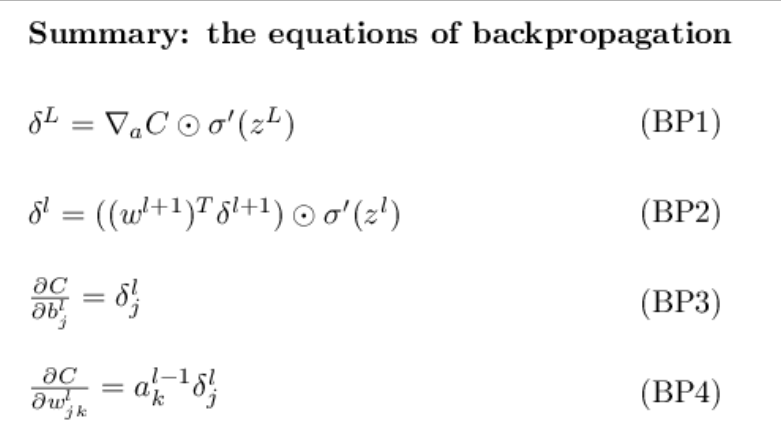


Keep in mind that "$\odot$" is different than the dot product from linear algebra. You will also need a library called [NumPY](https://numpy.org/doc/1.21/) (Numerical Python) which is very helpful for efficient computations as well as working with [Linear Algebra](https://github.com/ageron/handson-ml2/blob/master/math_linear_algebra.ipynb). Also, the equations above are picked from [here](http://neuralnetworksanddeeplearning.com/index.html). Have fun!

In [ ]:
X, y = load_boston(return_X_y=True)